<a href="https://colab.research.google.com/github/Anacleide0803/MVP/blob/main/Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP de Análise de Dados e Boas Práticas

1. Escopo
Neste projeto sera usado o dataset proveniente das bases de dados que compoem o programa Farmacia Popular. Seu objetivo é identifica entre os pacientes beneficiario do bolsa familia, das principais patologias.

Definição do Problema

Mapear a quantidade total de pessoas que foram beneficiadas pelo Programa Farmácia Popular do Brasil com a aquisição de medicamentos gratuitos para o tratamento de uma ou mais das seguintes indicações: hipertensão, diabetes, asma, osteoporose e contraceptivos.

Levantamento dos Requisitos e atributos:

As informações foram extraidas por amostragem de dez mil linhas dos sistemas do Programa Farmácia Popular do Brasil, gerido pela Coordenação-Geral do Programa Farmácia Popular e pelo DATASUS. São totalizadas todas as compras realizadas nas farmácias conveniadas de determinado município. Em seguida são contados os CPF únicos que realizaram as compras (titulares das receitas médicas) para identificar a quantidade de pessoas que foram beneficiadas. Os dados são vinculados ao município onde está localizada a farmácia, na qual foi feita a aquisição do medicamento.

Informações sobre as variaveis:

*   Item da lista
*   Item da lista


REGIAO - do paciente

*   Item da lista
*   Item da lista




*   QT_MEDICAMENTO - quantidade de medicamento adquirido. ex: uma cartela contendo 30 comprimido = QT_MEDICAMENTO = 30.
*   Item da lista


QTD_PACIENTE - quantidade de paciente
PATOLOGIA - referente a patologia adquirida (ex: asma, diabetes, hipertenção)
SEXO - sexo do paciente
IDADE - idade do paciente
COR - cor do paciente

```
# Isto está formatado como código
```



# Nova seção


2. Será utilizado o pacote Pandas (Python Data Analysis Library) para carregar o   arquivo .csv disponivel no repositorio Git: https://raw.githubusercontent.com/Anacleide0803/MVP/main/Bfamilia.csv


As bibliotecas utilizadas neste projeto foram:

numpy
pandas
matplotlib
seaborn
plotly
plotly
plotly
sklearn
plotly
warnings



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')

Baixando o csv do GIT e lê as colunas informadas no dataset = Bfamilia_csv(url, names=colunas, skiprows=1, delimiter=',')

In [ ]:
import pandas as pd
import requests
import io
url='https://raw.githubusercontent.com/Anacleide0803/MVP/main/Bfamilia.csv'
dowload=requests.get(url).content # Baixando o csv do Git
dfBfamilia=pd.read_csv(io.StringIO(dowload.decode('latin-1'))) # Lê o conteudo do arquivo e transforma em um pandas data frame.
dfBfamilia.head(10) # Lê as 10 primeiras linhas

,REGIAO,QT_MEDICAMENTO,QTD_PACIENTE,PATOLOGIA,SEXO,IDADE,COR
0,NORDESTE,200,1,ASMA,M,42,PARDA
1,CENTRO-OESTE,60,1,HIPERTENSAO,F,43,NEGRA
2,SUL,200,1,ASMA,F,25,PARDA
3,NORDESTE,30,1,HIPERTENSAO,M,43,AMARELA
4,NORDESTE,30,3,HIPERTENSAO,F,48,AMARELA
5,NORDESTE,30,1,HIPERTENSAO,F,54,PARDA
6,NORDESTE,200,1,ASMA,F,42,PARDA
7,SUDESTE,200,1,ASMA,M,15,SEM INFORMACAO
8,SUDESTE,30,1,DIABETES,M,55,BRANCA
9,NORDESTE,200,1,ASMA,F,22,PARDA


3. Análisando o  Dados  
3.1. Estatísticas Descritivas
Analisando as dimensões do conjunto de dados, suas informações e alguns exemplos de linhas.

In [ ]:
numRows, numColumns = dfBfamilia.shape
columns_names = list(dfBfamilia.columns)
print("Número de linhas: ", numRows, "\nNúmero de colunas: ", numColumns) # Retorna a quantidade de linhas do dataset
print("Nome das colunas: ", columns_names) # Retorna a quantidade de colunas  do dataset
num_features = list(dfBfamilia.select_dtypes(include=np.number).columns) # Retorna os nomes das colunas numéricas do dataset
cat_features = list(np.setdiff1d(columns_names,num_features)) # Retorna a lista com nome das colunas categoricas

print("Atributos Numéricos: ", num_features, "\nAtributos Categóricos: ", cat_features)

Número de linhas:  8684 
Número de colunas:  7
Nome das colunas:  ['REGIAO', 'QT_MEDICAMENTO', 'QTD_PACIENTE', 'PATOLOGIA', 'SEXO', 'IDADE', 'COR']
Atributos Numéricos:  ['QT_MEDICAMENTO', 'QTD_PACIENTE', 'IDADE'] 
Atributos Categóricos:  ['COR', 'PATOLOGIA', 'REGIAO', 'SEXO']


In [ ]:
# Os tipos das variaveis e se possui valores nulos ou missing.
print(dfBfamilia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REGIAO          8684 non-null   object
 1   QT_MEDICAMENTO  8684 non-null   int64 
 2   QTD_PACIENTE    8684 non-null   int64 
 3   PATOLOGIA       8684 non-null   object
 4   SEXO            8684 non-null   object
 5   IDADE           8684 non-null   int64 
 6   COR             8684 non-null   object
dtypes: int64(3), object(4)
memory usage: 475.0+ KB
None


In [ ]:
# O tipo de dado de cada atributo
dfBfamilia.dtypes

REGIAO            object
QT_MEDICAMENTO     int64
QTD_PACIENTE       int64
PATOLOGIA         object
SEXO              object
IDADE              int64
COR               object
dtype: object

In [ ]:
# resumo estatístico do conjunto de dados (média, desvio padrão, mínimo, máximo e os quartis)
dfBfamilia.describe()

,QT_MEDICAMENTO,QTD_PACIENTE,IDADE
count,8684.000000,8684.000000,8684.000000
mean,79.297674,1.151543,48.599263
std,82.978181,0.388800,13.711996
min,0.000000,1.000000,0.000000
25%,30.000000,1.000000,44.000000
50%,60.000000,1.000000,52.000000
75%,60.000000,1.000000,58.000000
max,400.000000,4.000000,76.000000


REssalta-se com base no coeficiente de variação (104.64%) que a variavel QTD_MEDICAMENTO apresenta alta variabilidade em torno da media e  com base na mediana (segundo quartil) tem-se que 50% da quantidade de medicamento estão abaixo de 60.000 e a outra metade tem uma quantidade maior que 60%.
obserserva-se que a idade mediana dos pacientes e de 52 anos e maior idade observada é de 76 anos e a menor idade e a menor idade observada é 0 anos.
Os dados estão mais concentrados em torno da media (coeficiente de variação = 28.21%)

In [ ]:
# Calculando o coeficiente de dispessão
cv=lambda x: np.std(x,ddof=1)/np.mean(x)*100
cv(dfBfamilia)

QT_MEDICAMENTO    104.641381
QTD_PACIENTE       33.763390
IDADE              28.214411
dtype: float64

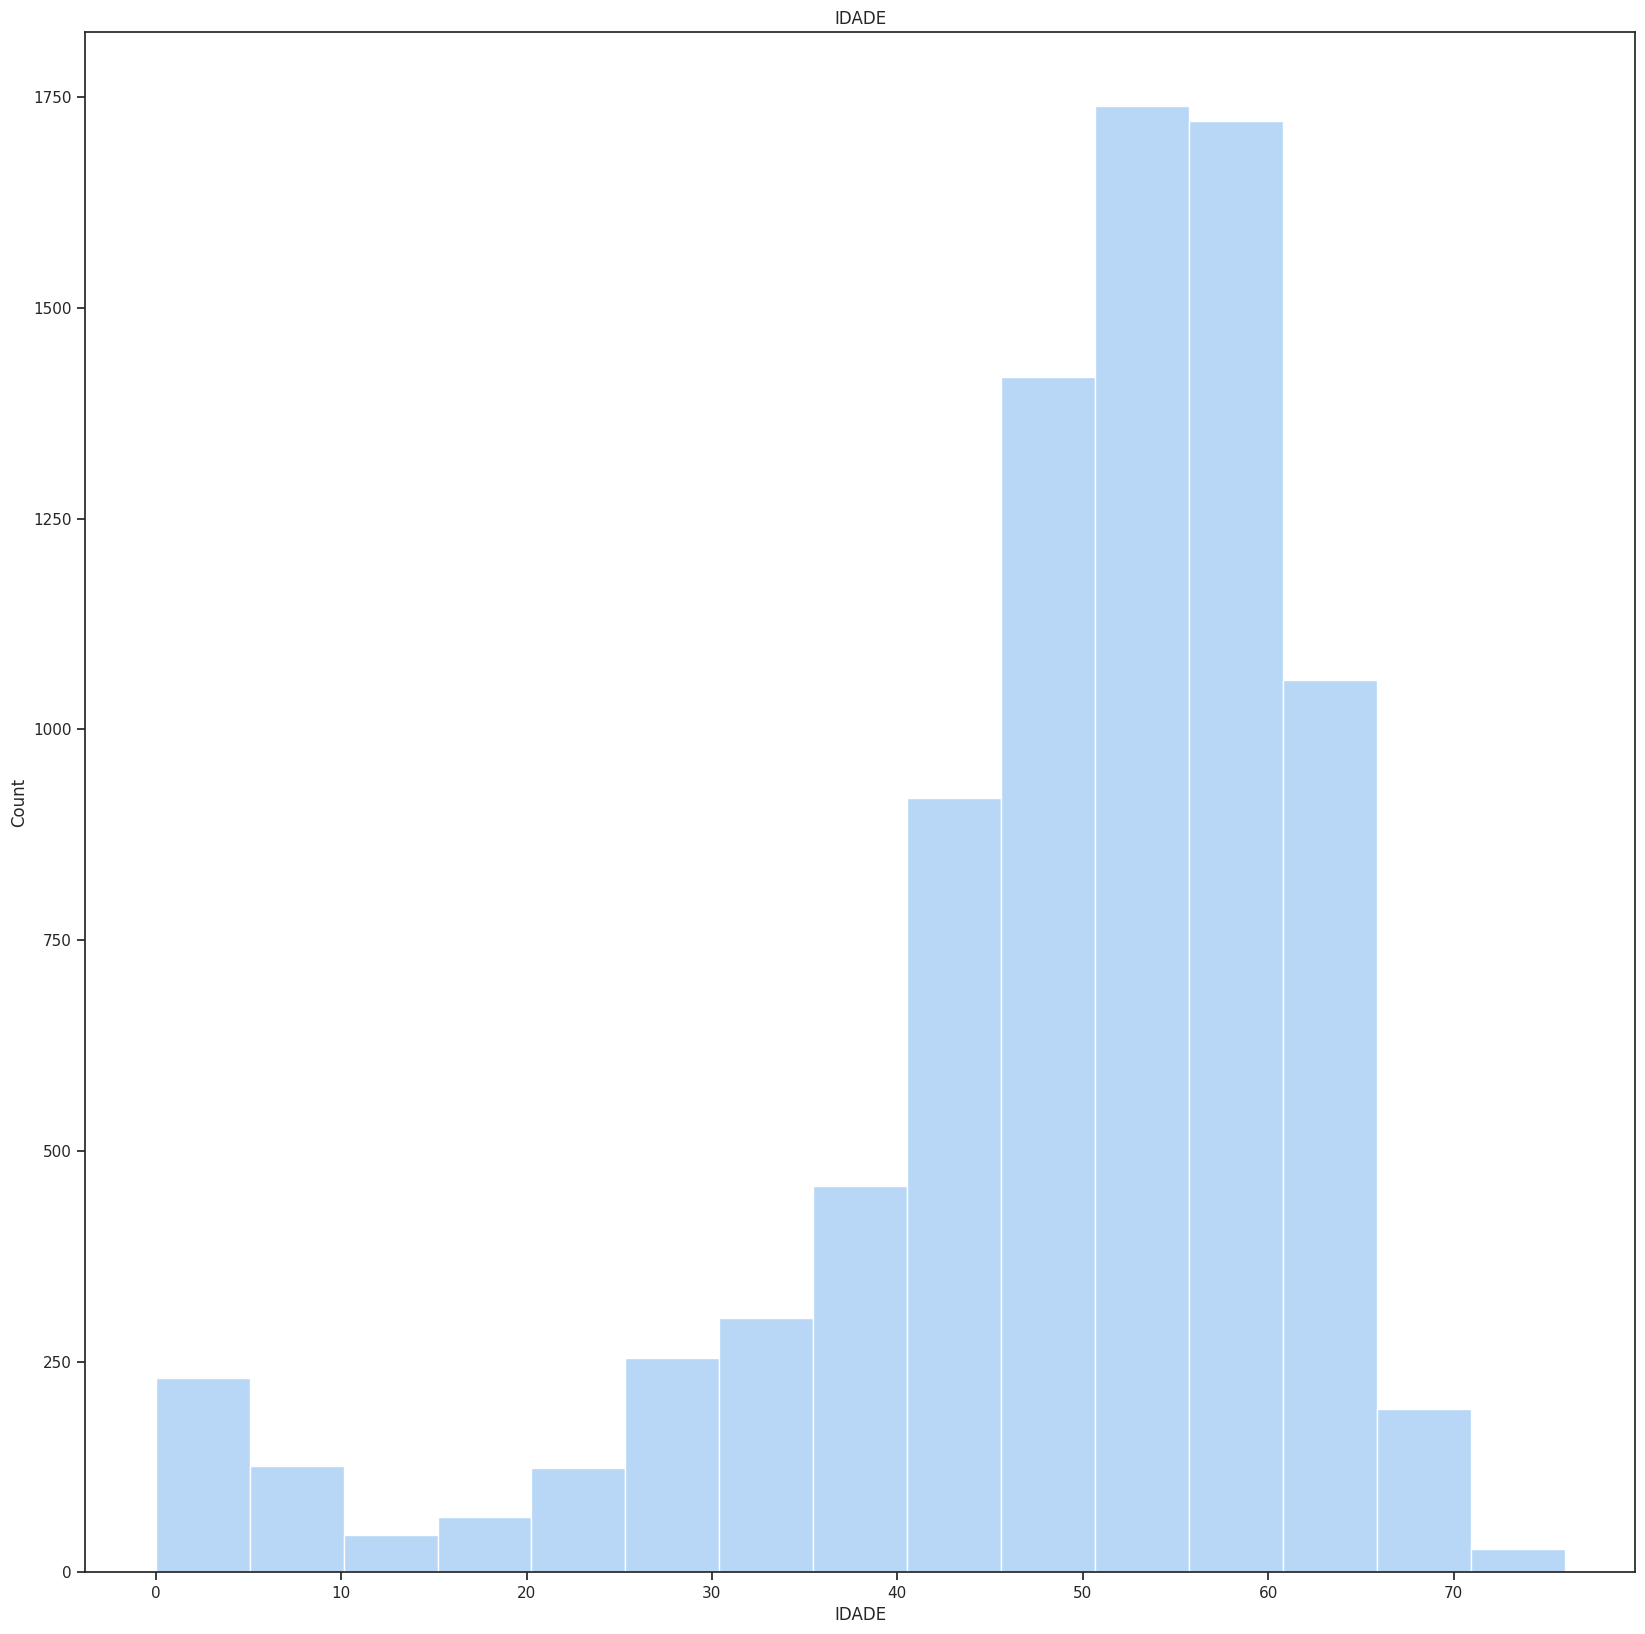

In [150]:
# Criando histograma com base na idade dos pacientes
plt.title('IDADE')
sns.histplot(dfBfamilia.IDADE, bins=15)
plt.show()

Observa-se que os dados apresentam assimetria a esquerda e nota-se que a mediana é maior que a media.

Visualização dos valores para as colunas numéricas

In [ ]:
dfBfamilia.skew()

QT_MEDICAMENTO    2.678974
QTD_PACIENTE      2.514743
IDADE            -1.529767
dtype: float64

<Axes: title={'center': 'IDADE'}, ylabel='IDADE'>

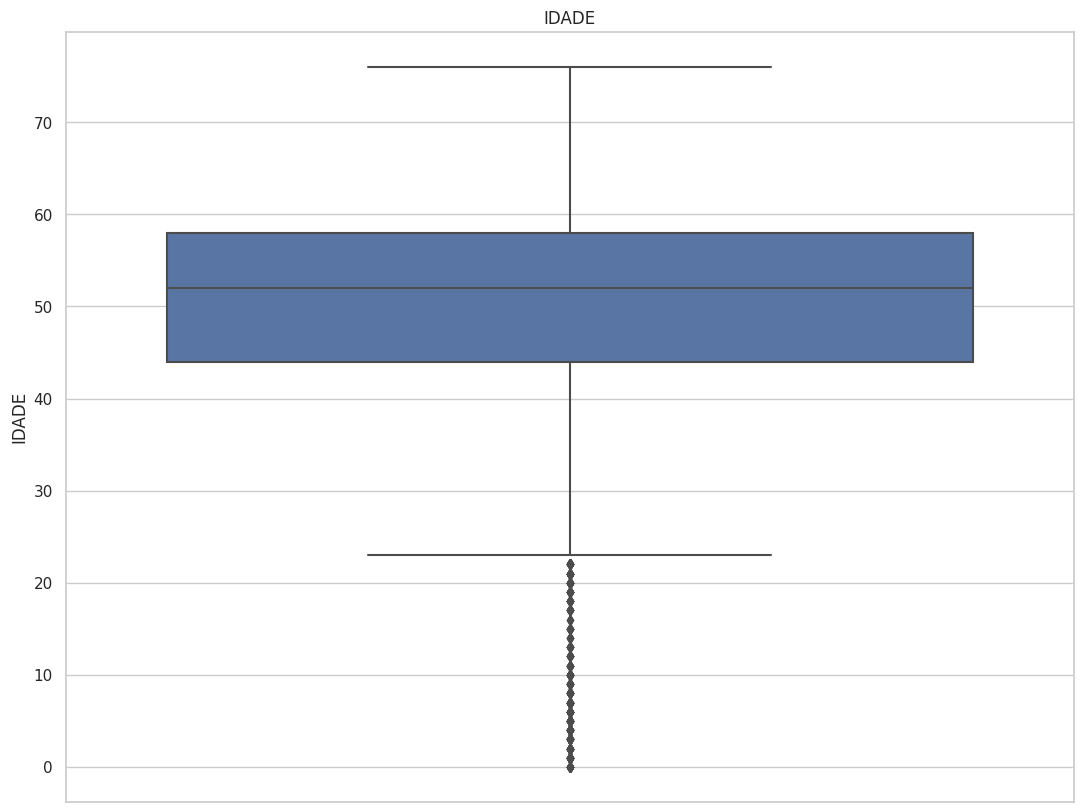

In [142]:
# Criando boxplot baseado na idade dos pacientes

plt.title("IDADE")
sns.boxplot(y= 'IDADE', data= dfBfamilia )

observa-se que existem a presença de muitos valores discrepante nos dados idades inferiores a 23 anos.
Formula = LI (limite inferior) = Q1-1.5*(Q3-Q1)
LS= (LIMITE SUPERIOR) = Q3+1.5*(Q3-Q1)

<Axes: title={'center': 'QT_MEDICAMENTO'}, ylabel='QT_MEDICAMENTO'>

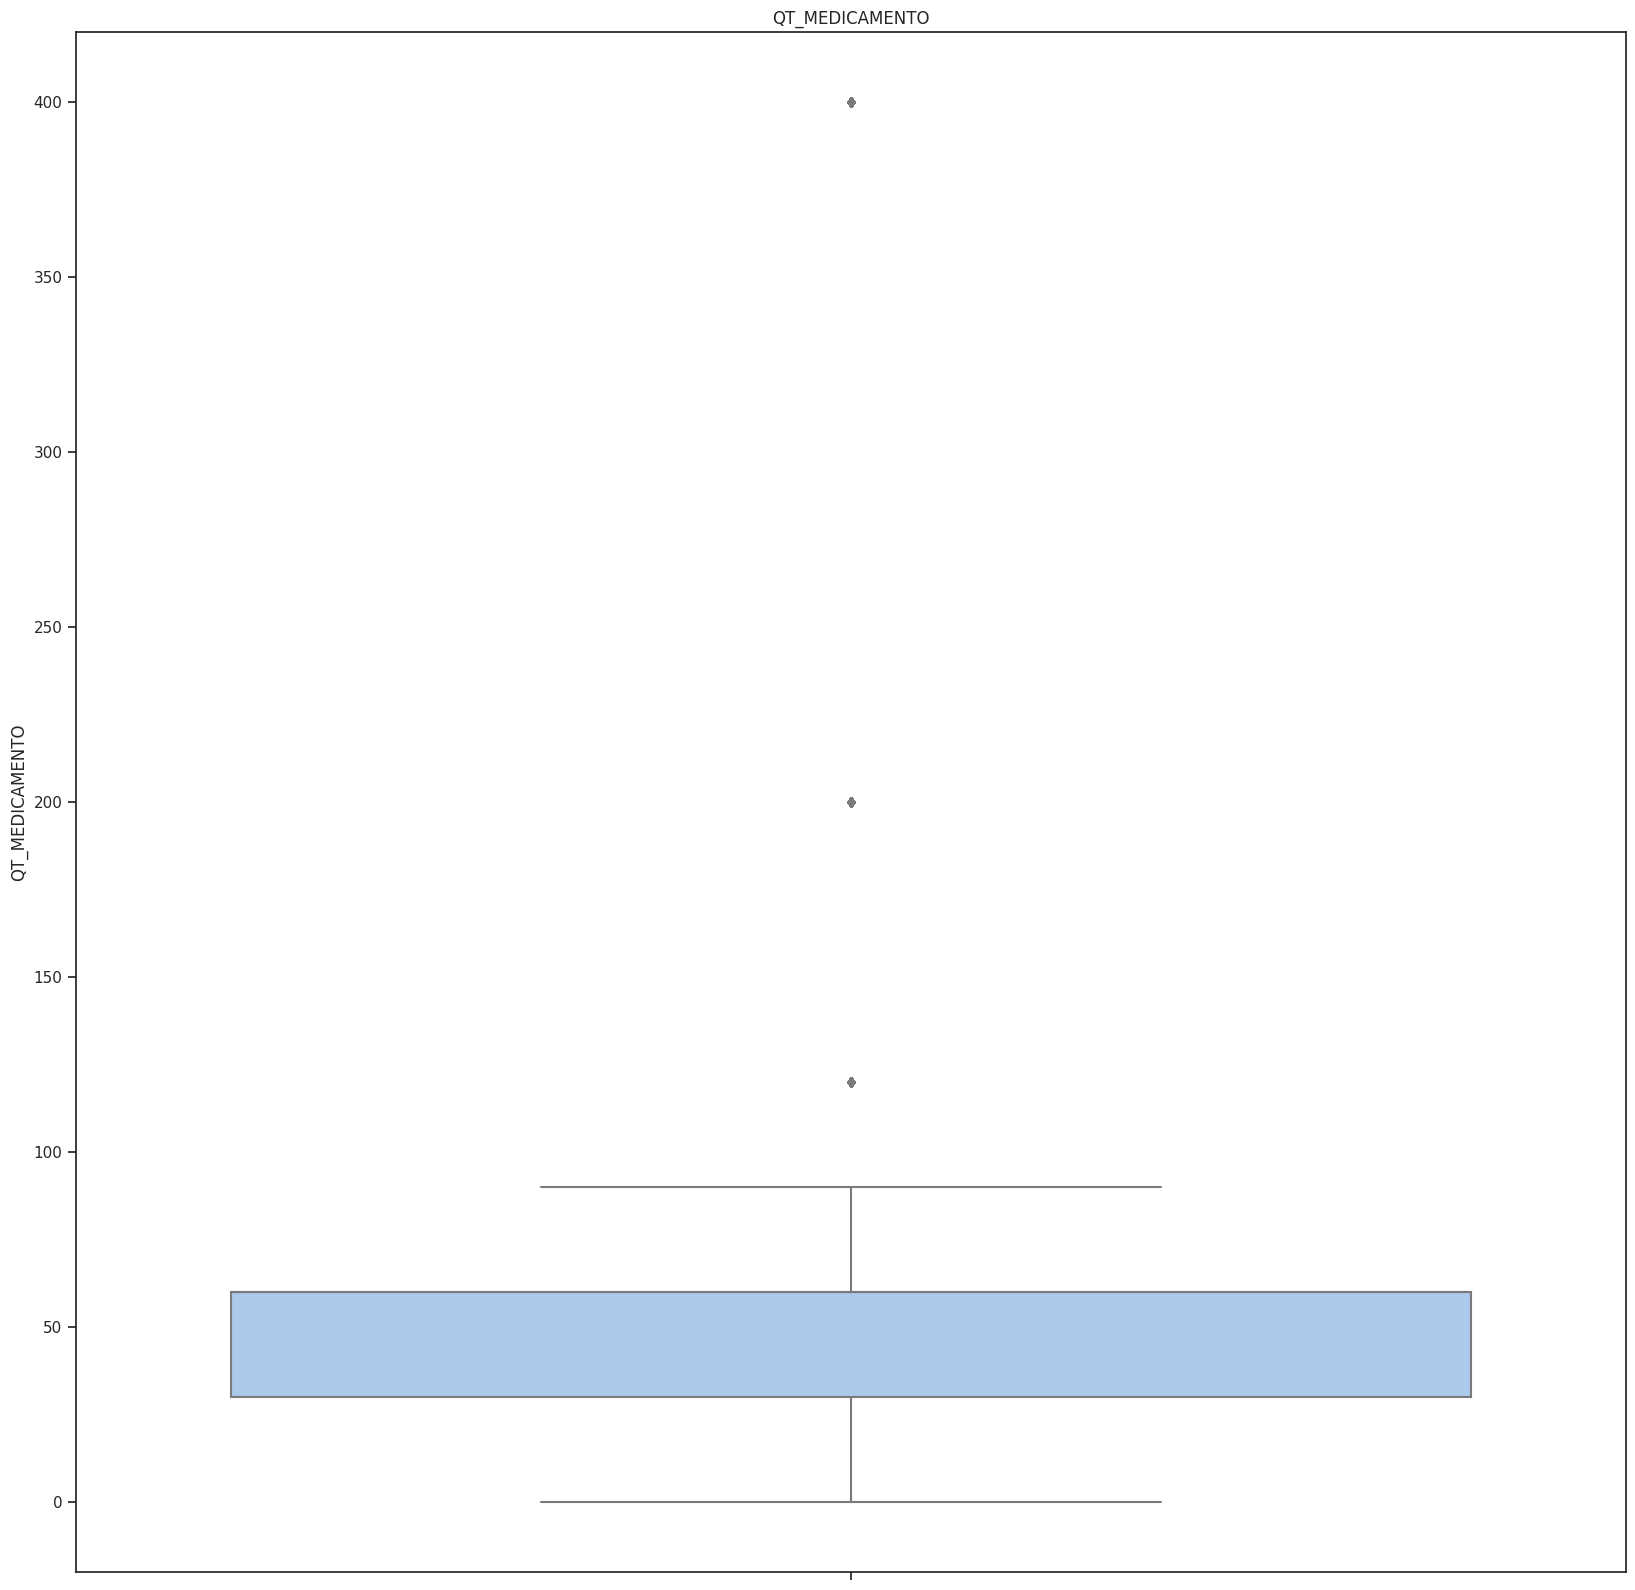

In [160]:
# Criando boxplot da distribuição da quantidade de medicamento

plt.title("QT_MEDICAMENTO")
sns.boxplot(y= 'QT_MEDICAMENTO', data= dfBfamilia )

observa-se que existem a presença de alguns valores discrepante nos dados quantidade de medicamentos superiores  a 105.
LS= (LIMITE SUPERIOR) = Q3+1.5(Q3-Q1)

Colocar boxplot para QTD_MEDICAMENTO

Analise das distribuição bidimensional

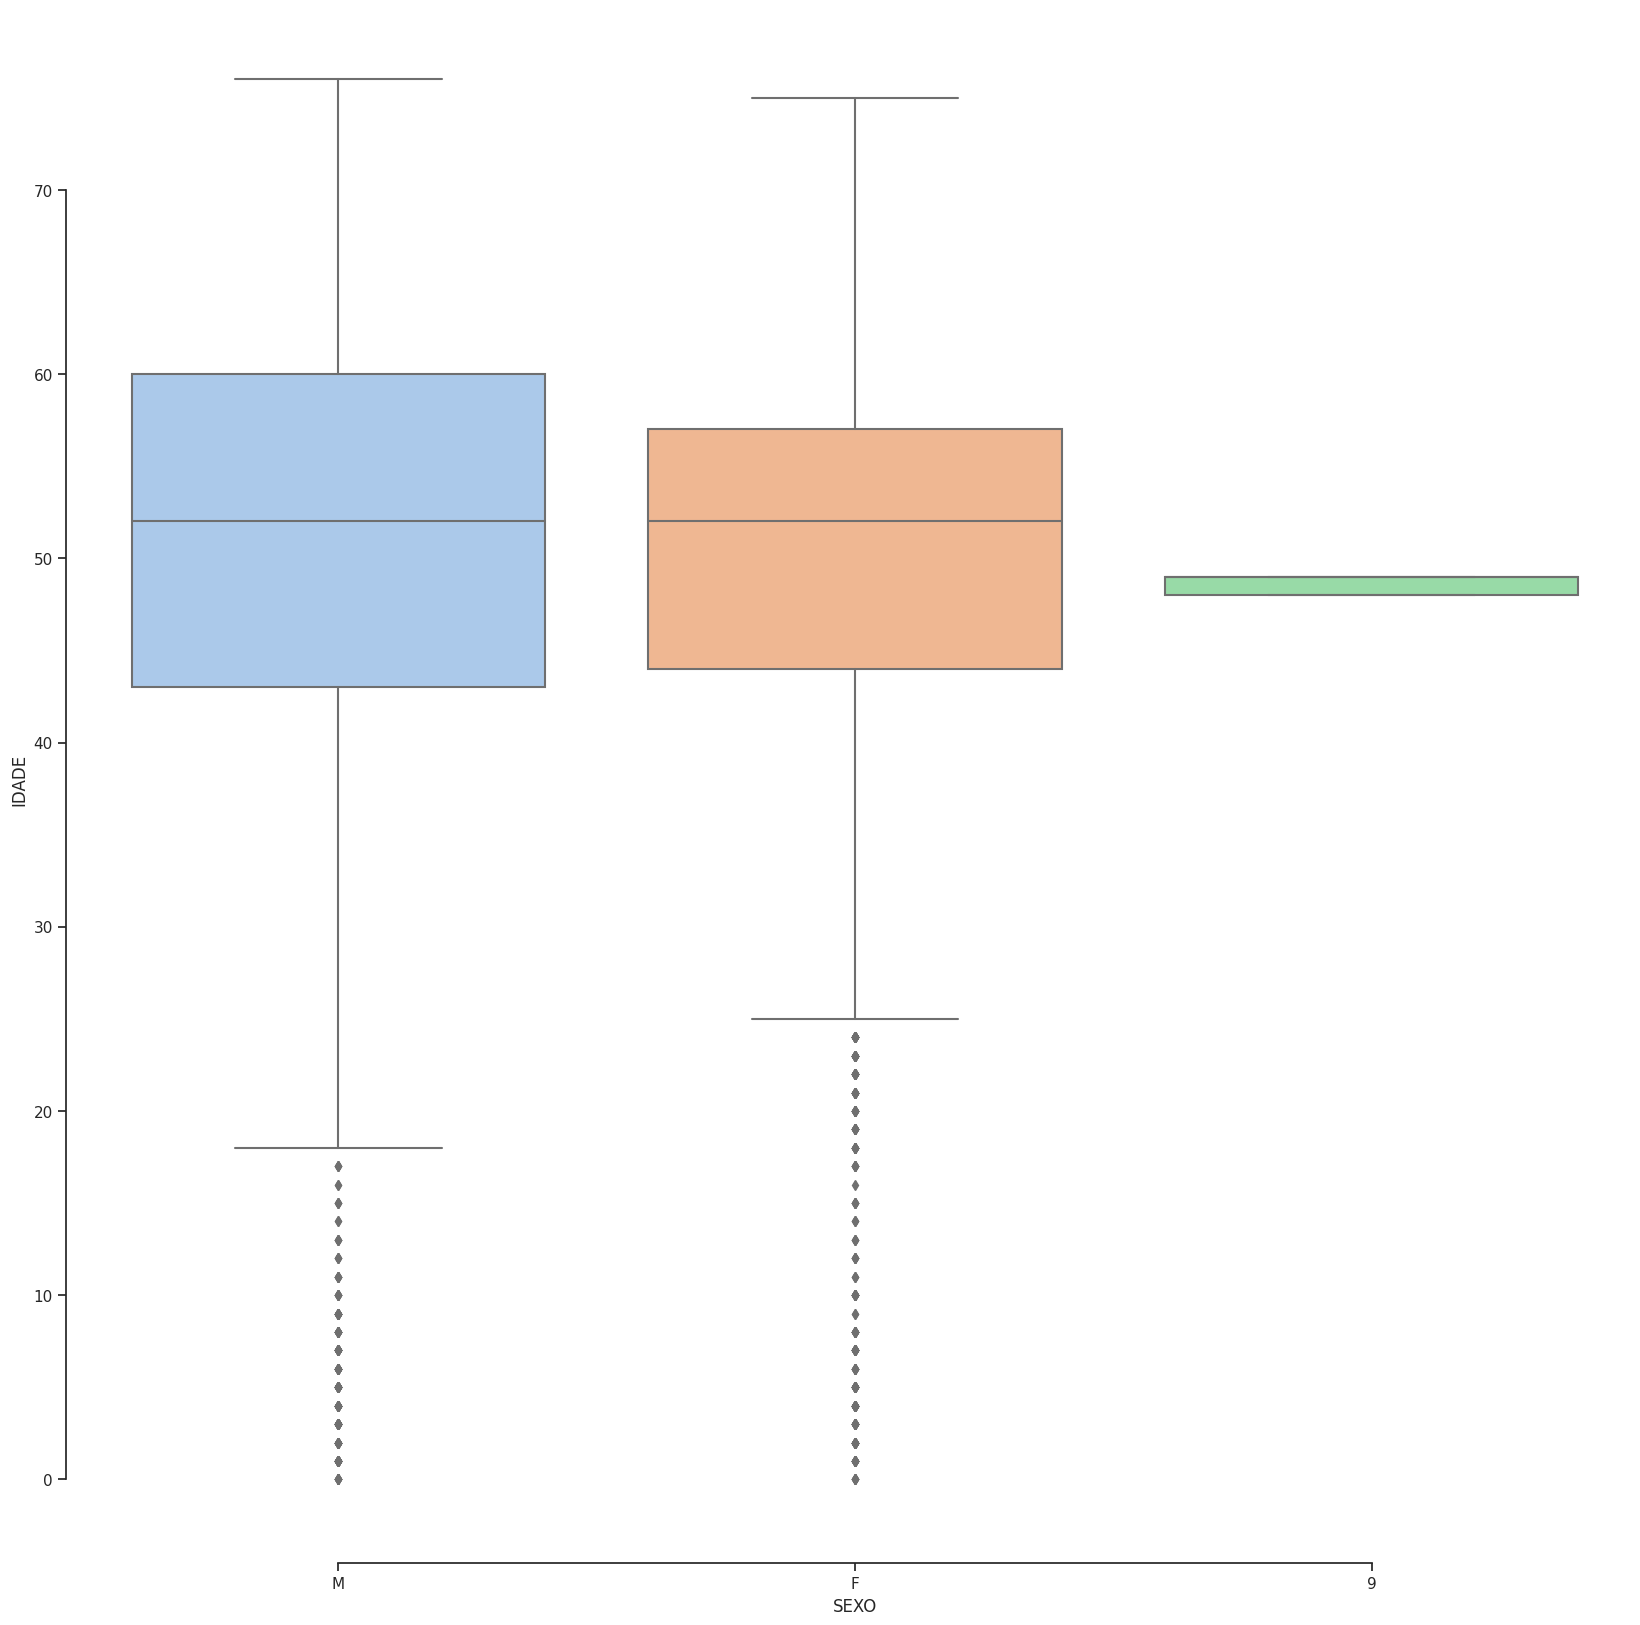

In [158]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="SEXO",y="IDADE",
              data=dfBfamilia)
sns.despine(offset=10, trim=True)

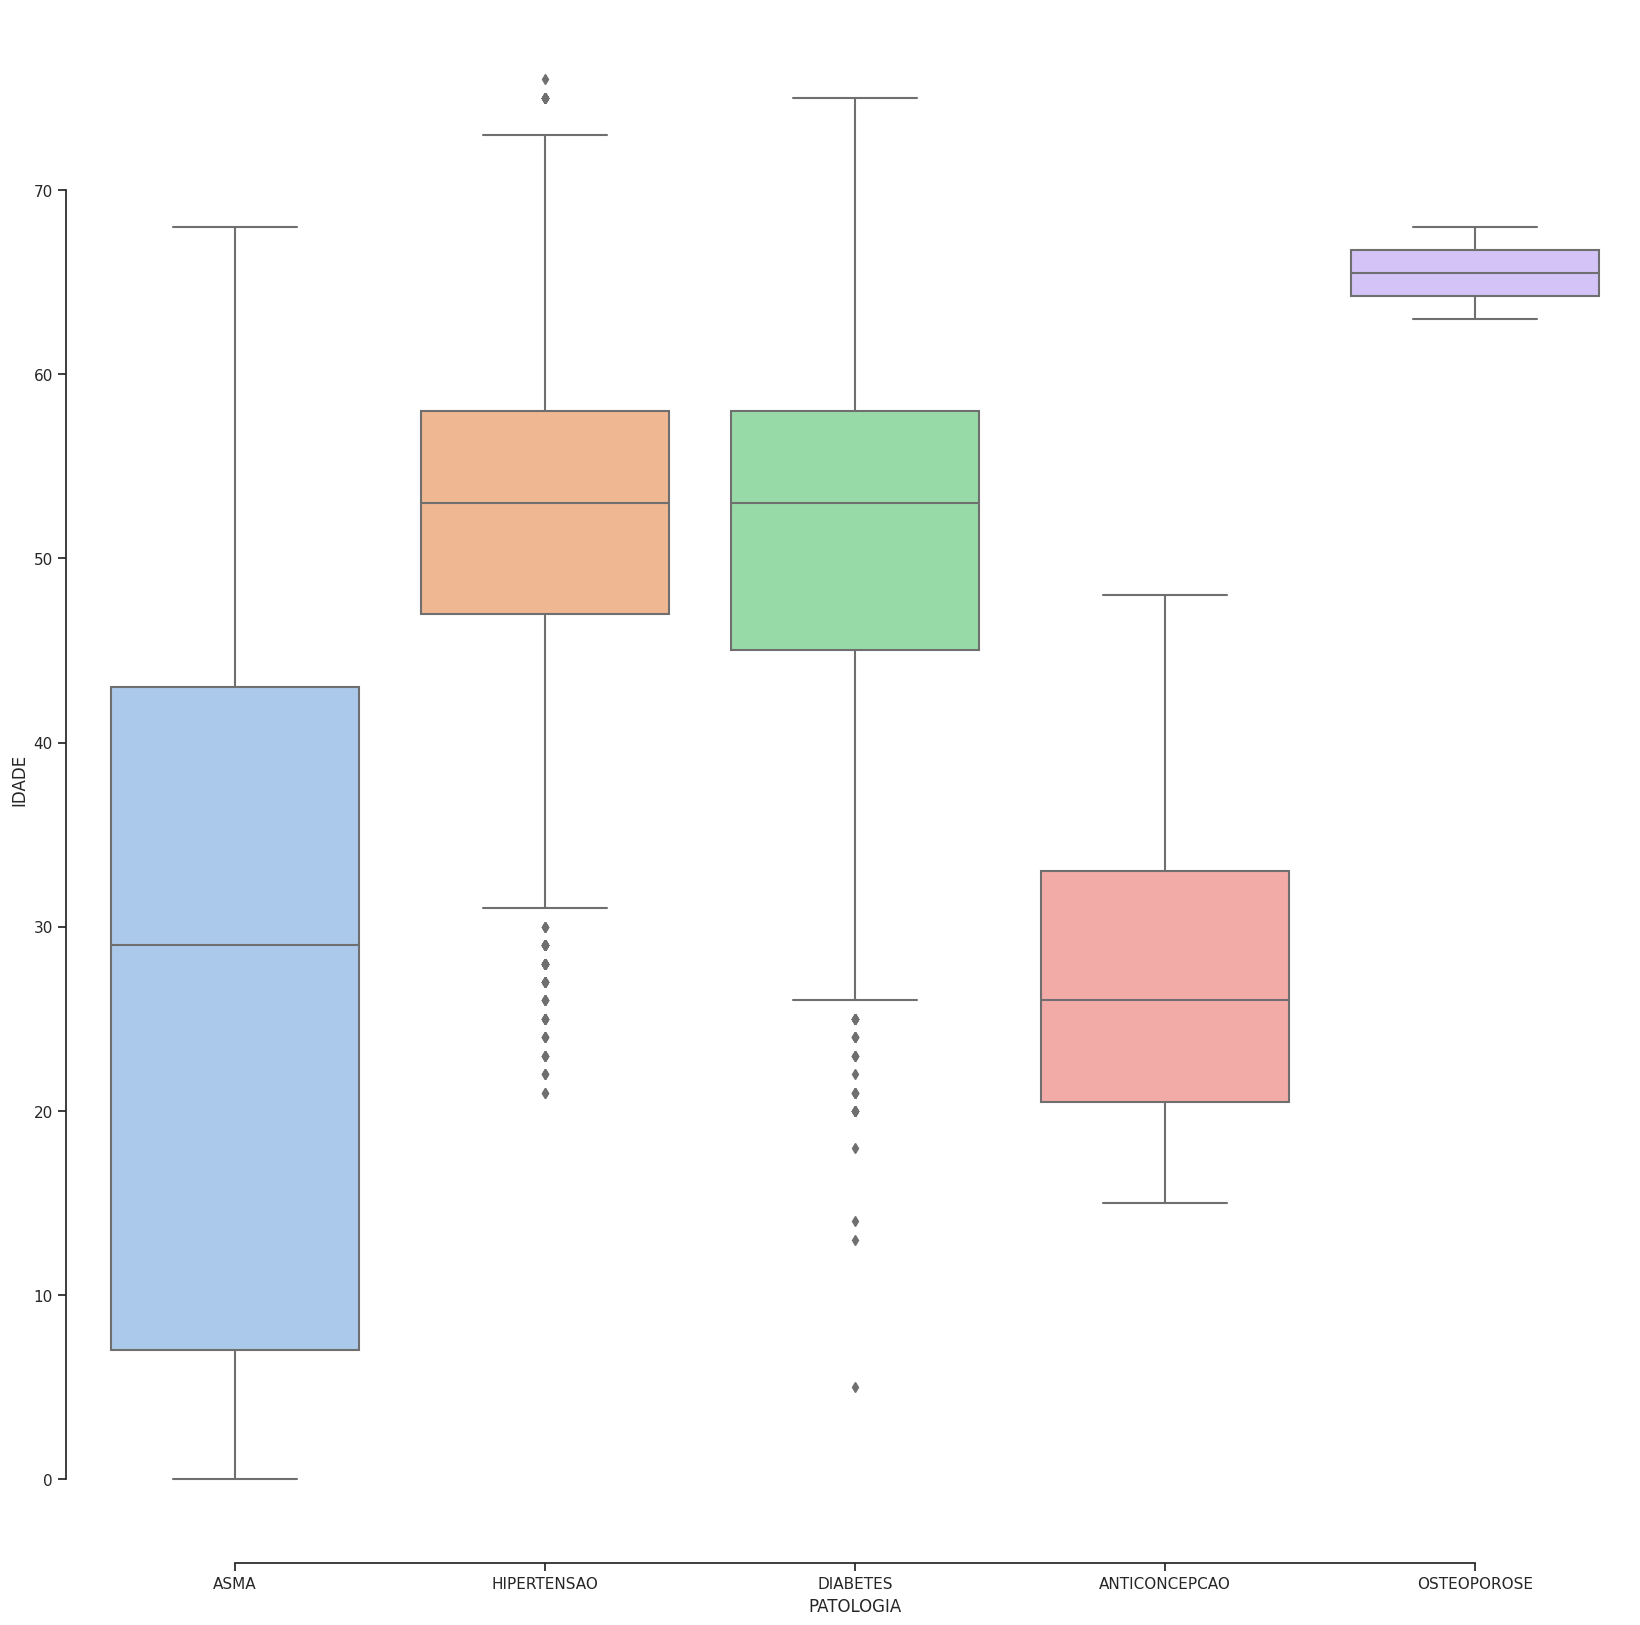

In [161]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="PATOLOGIA",y="IDADE",
              data=dfBfamilia)
sns.despine(offset=10, trim=True)

In [164]:
print(dfBfamilia.groupby('PATOLOGIA').describe())

              QT_MEDICAMENTO                                             \
                       count        mean         std  min    25%    50%   
PATOLOGIA                                                                 
ANTICONCEPCAO          103.0    1.000000    0.000000  1.0    1.0    1.0   
ASMA                  1092.0  265.238095  102.127857  0.0  200.0  200.0   
DIABETES              2061.0   66.370694   32.747955  0.0   30.0   60.0   
HIPERTENSAO           5426.0   48.300774   20.329693  0.0   30.0   60.0   
OSTEOPOROSE              2.0    4.000000    0.000000  4.0    4.0    4.0   

                            QTD_PACIENTE            ...             IDADE  \
                 75%    max        count      mean  ...  75%  max   count   
PATOLOGIA                                           ...                     
ANTICONCEPCAO    1.0    1.0        103.0  1.000000  ...  1.0  1.0   103.0   
ASMA           400.0  400.0       1092.0  1.153846  ...  1.0  2.0  1092.0   
DIABETES      

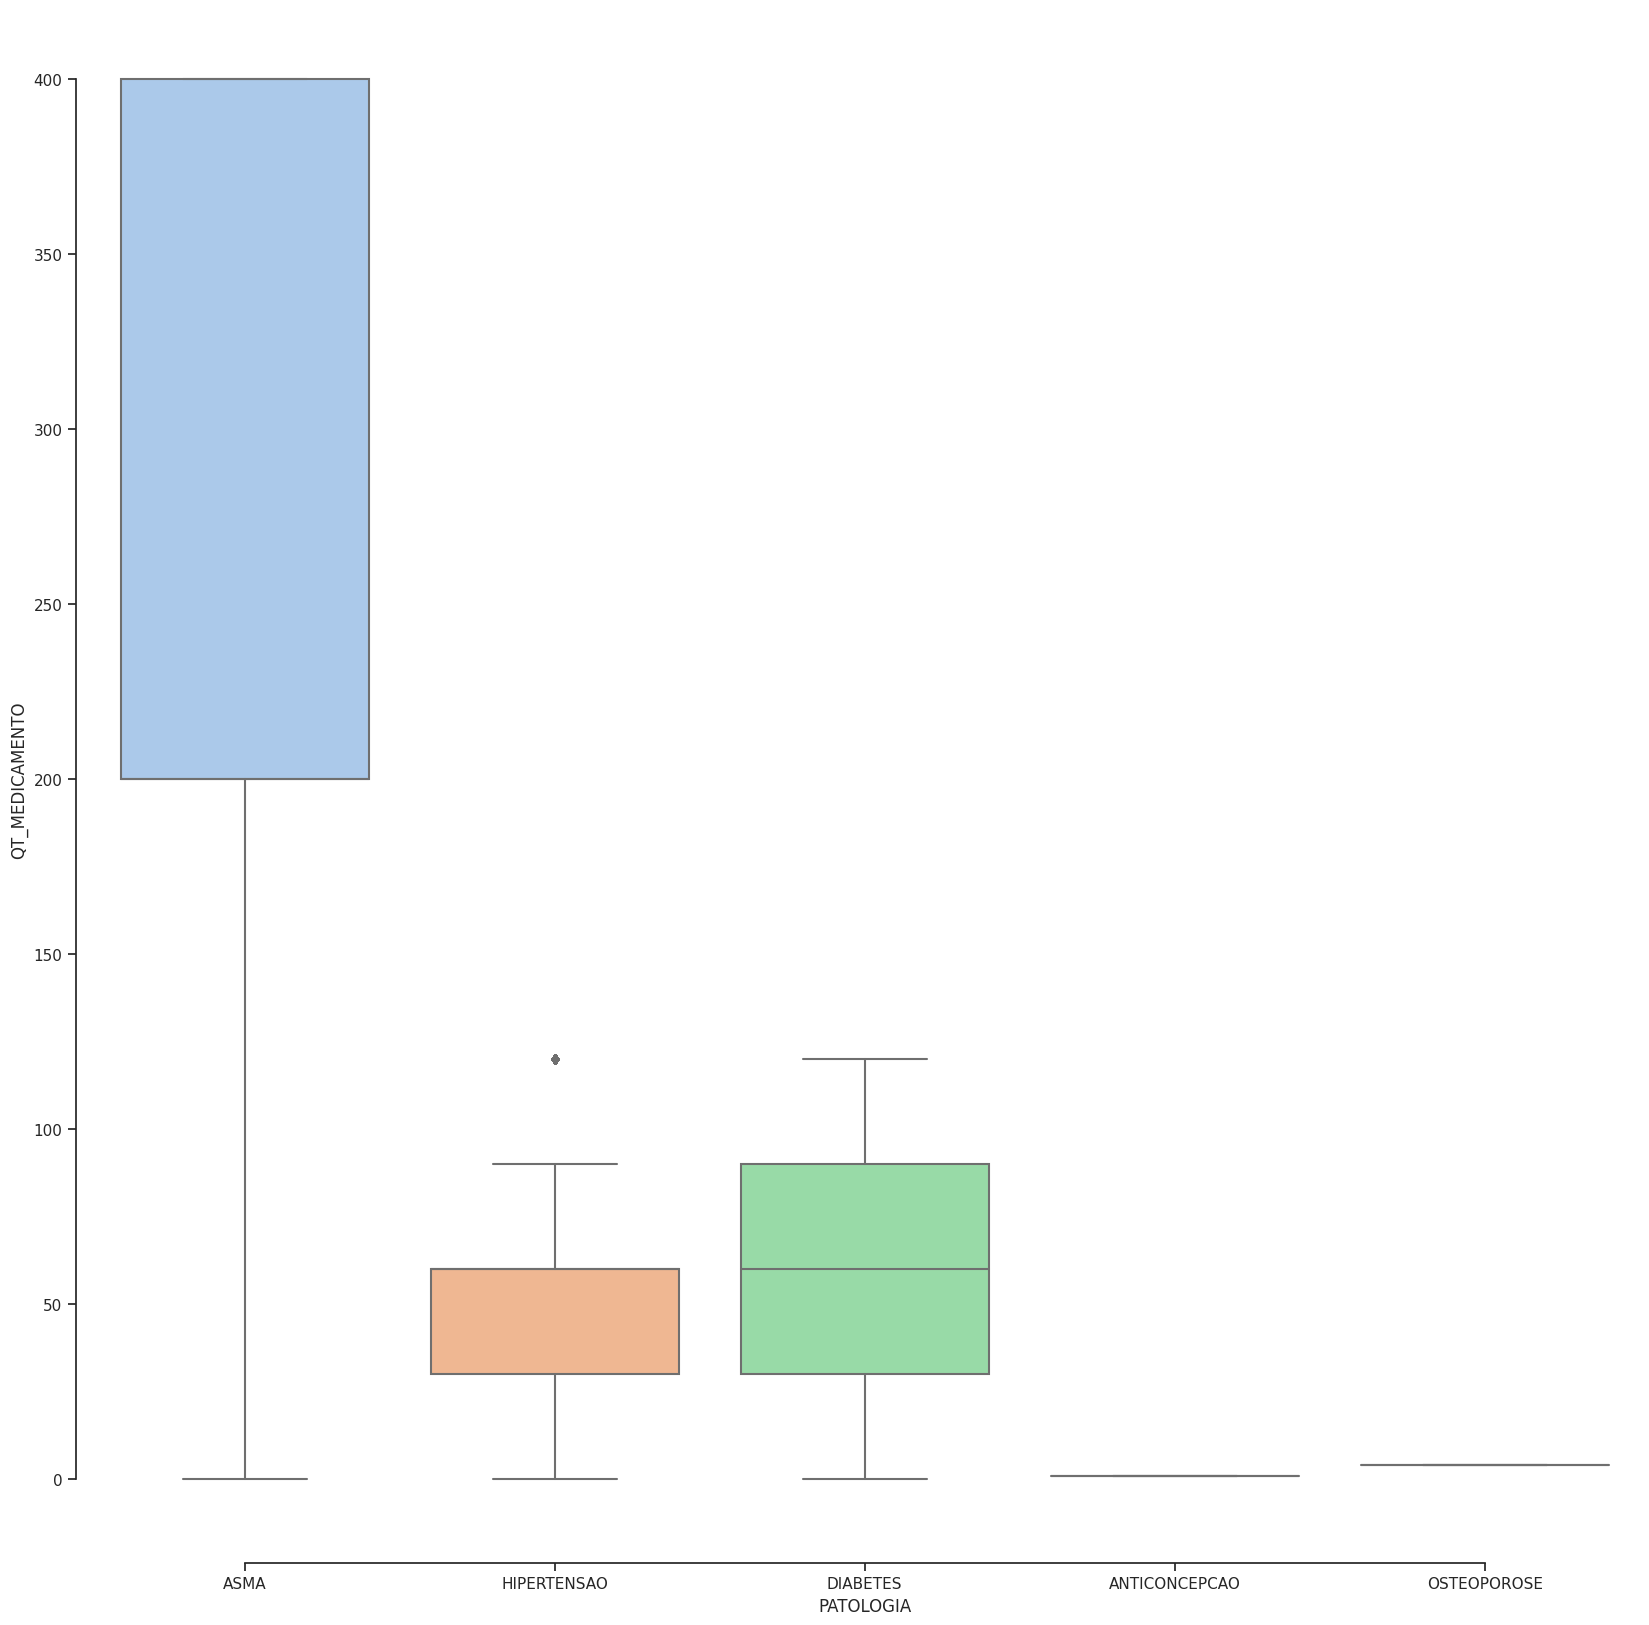

In [156]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="PATOLOGIA",y="QT_MEDICAMENTO",
              data=dfBfamilia)
sns.despine(offset=10, trim=True)

Visualizando a distribuição dos valores para as colunas categoricas

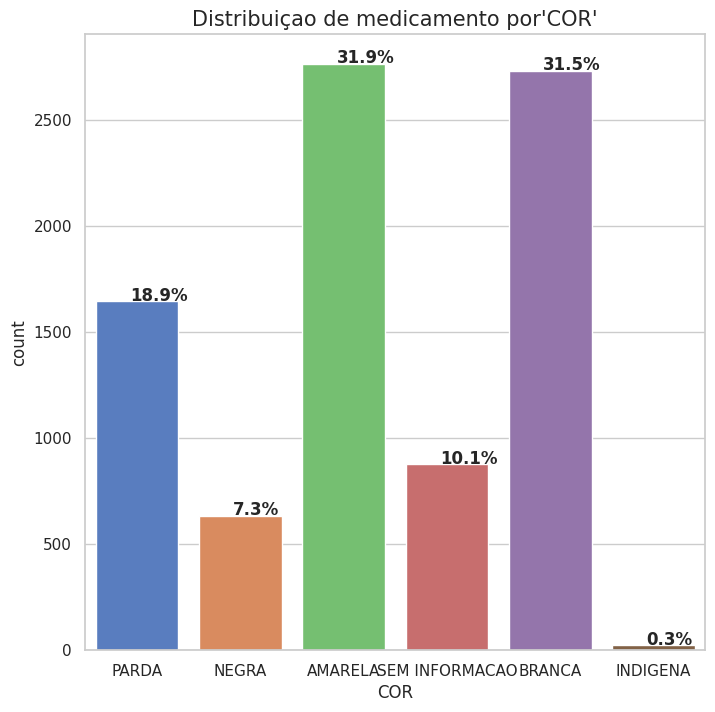

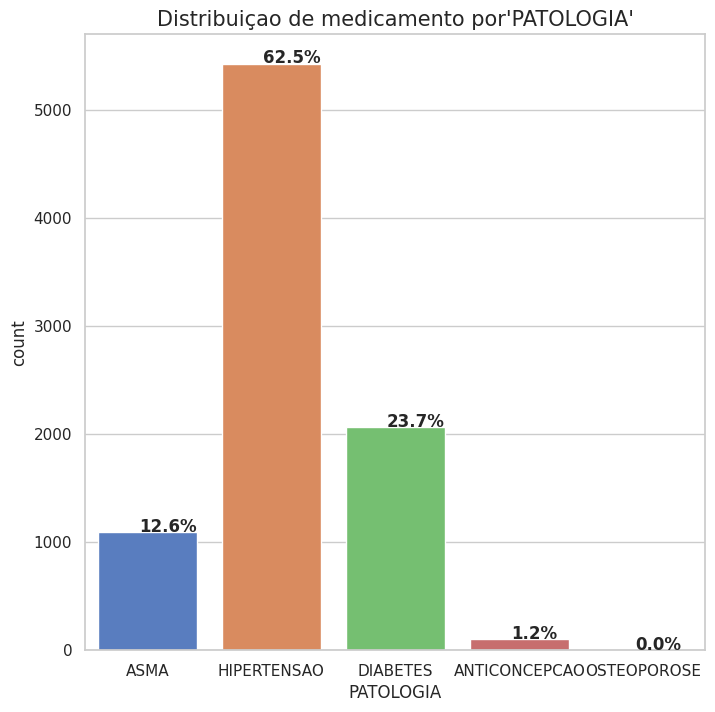

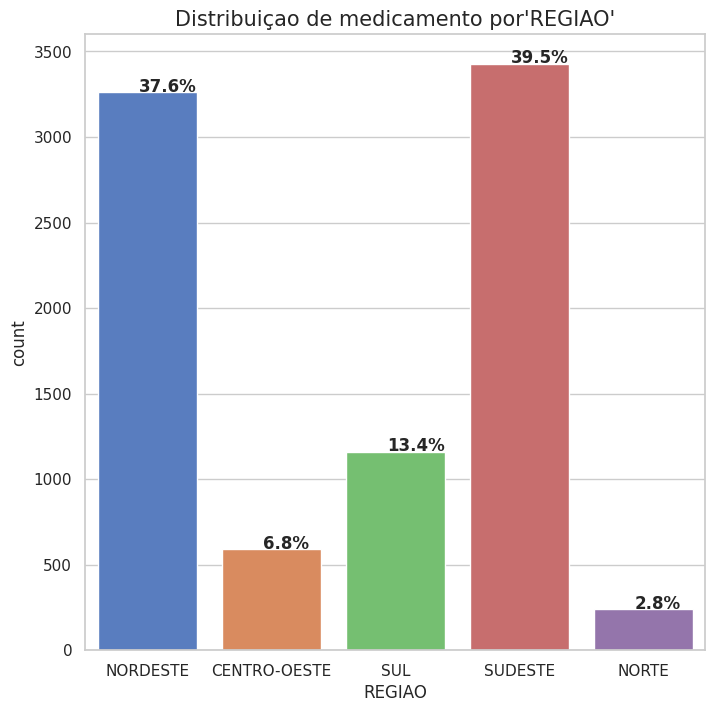

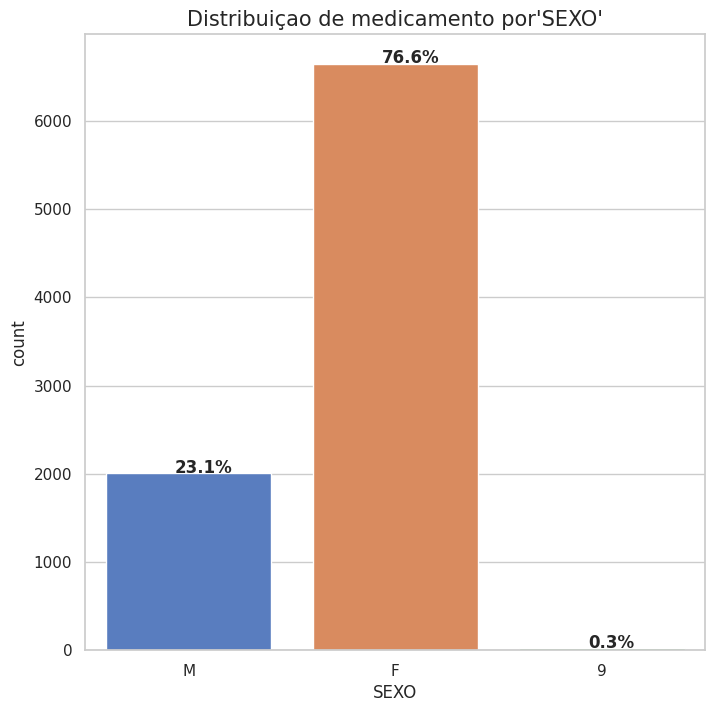

In [157]:
# Visualizando a distribuição dos valores para as colunas categóricas
for cat_feature in cat_features:

    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = dfBfamilia[cat_feature],label="Count", palette = "muted")
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2.4,rect.get_height()+2,"%.1f%%"% (rect.get_height()/ numRows *100),
                 weight='bold', fontsize = 12 )
    plt.title("Distribuiçao de medicamento por'" + str(cat_feature) + "'", fontsize = 15)